#  MANGROVE SEEDLINGS IMAGE RECOGNITION SYSTEM

> USING DARKNET'S YOLO V4





In [ ]:
ytnjmu,ktnhy,kjfnhyvyh

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/yolov4
%cd /mydrive/yolov4

/


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
ls

darknet/  obj.names  process.py  yolov4-custom.cfg
obj.data  obj.zip    training/


In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


In [ ]:
ls

3rdparty/                darknet_video.py       predictions.jpg
backup/                  data/                  process.py
build/                   image_yolov3.sh        __pycache__/
build.ps1                image_yolov4.sh        README.md
cfg/                     include/               results/
chart.png                json_mjpeg_streams.sh  scripts/
chart_yolov4-custom.png  libdarknet.so          src/
cmake/                   LICENSE                uselib
CMakeLists.txt           Makefile               vcpkg.json
darknet                  net_cam_v3.sh          video_yolov3.sh
DarknetConfig.cmake.in   net_cam_v4.sh          video_yolov4.sh
darknet_images.py        obj/                   yolov4.conv.137
darknet.py               photo.jpg


In [ ]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder 

!unzip /mydrive/yolov4/obj.zip -d data/

In [ ]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /mydrive/yolov4/yolov4-custom.cfg cfg

# verify if your custom file is in cfg folder
!ls cfg/

yolov4-custom.cfg


In [ ]:
#@title
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 

!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

# verify if the above files are in data folder
!ls data/

In [ ]:
# Copy the process.py file to the current darknet directory 

!cp /mydrive/yolov4/process.py .

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

In [ ]:
# Download the yolov4 pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map


In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


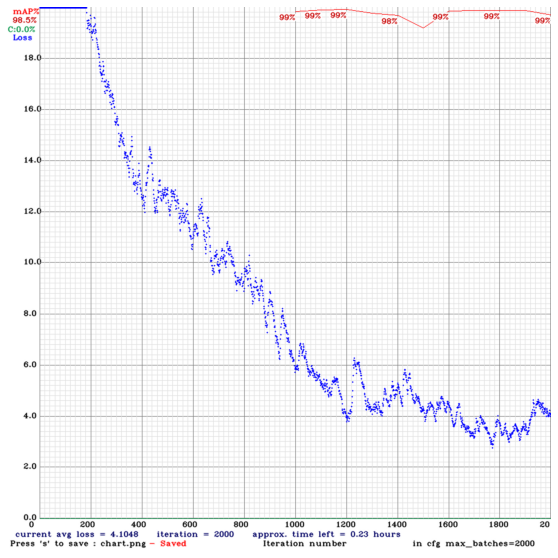

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_4000.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/My Drive/yolov4/darknet/cfg
/content/gdrive/My Drive/yolov4/darknet


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights /mydrive/mask_test_images/image1.jpg /mydrive/yolov4/training/yolov4-custom_last.weights -thresh 0.3 
imShow('predictions.jpg')


In [ ]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

!./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/finalresult.avi 

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:

seedlings: 99% 
seedlings: 95% 
seedlings: 91% 
seedlings: 90% 
seedlings: 90% 
seedlings: 84% 
seedlings: 82% 
seedlings: 80% 
seedlings: 79% 
seedlings: 74% 
seedlings: 70% 
seedlings: 60% 
seedlings: 54% 
seedlings: 39% 

FPS:13.6 	 AVG_FPS:13.5

 cvWriteFrame 
Objects:

seedlings: 99% 
seedlings: 95% 
seedlings: 95% 
seedlings: 94% 
seedlings: 89% 
seedlings: 83% 
seedlings: 81% 
seedlings: 80% 
seedlings: 79% 
seedlings: 79% 
seedlings: 76% 
seedlings: 68% 
seedlings: 62% 
seedlings: 57% 
seedlings: 52% 
seedlings: 38% 
seedlings: 30% 

FPS:13.9 	 AVG_FPS:13.5

 cvWriteFrame 
Objects:

seedlings: 94% 
seedlings: 93% 
seedlings: 91% 
seedlings: 89% 
seedlings: 89% 
seedlings: 89% 
seedlings: 87% 
seedlings: 87% 
seedlings: 85% 
seedlings: 85% 
seedlings: 78% 
seedlings: 74% 
seedlings: 63% 
seedlings: 62% 
seedlings: 55% 
seedlings: 51% 
seedlings: 44% 

FPS:14.0 	 AVG_FPS:13.5

 cvWriteFrame 
Objects:

see

In [ ]:
#run detector on images captured by webcam for your custom YOLOv4 trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights photo.jpg -thresh 0.5
imShow('predictions.jpg')   

In [ ]:
import time
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
from absl import app, flags, logging
from absl.flags import FLAGS
import core.utils as utils
from core.yolov4 import filter_boxes
from tensorflow.python.saved_model import tag_constants
from PIL import Image
import cv2
import numpy as np
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

flags.DEFINE_string('framework', 'tf', '(tf, tflite, trt')
flags.DEFINE_string('weights', './checkpoints/yolov4-416',
                    'path to weights file')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_boolean('tiny', False, 'yolo or yolo-tiny')
flags.DEFINE_string('model', 'yolov4', 'yolov3 or yolov4')
flags.DEFINE_string('video', './data/video/video.mp4', 'path to input video or set to 0 for webcam')
flags.DEFINE_string('output', None, 'path to output video')
flags.DEFINE_string('output_format', 'XVID', 'codec used in VideoWriter when saving video to file')
flags.DEFINE_float('iou', 0.45, 'iou threshold')
flags.DEFINE_float('score', 0.25, 'score threshold')
flags.DEFINE_boolean('dont_show', False, 'dont show video output')

def main(_argv):
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config=config)
    STRIDES, ANCHORS, NUM_CLASS, XYSCALE = utils.load_config(FLAGS)
    input_size = FLAGS.size
    video_path = FLAGS.video

    if FLAGS.framework == 'tflite':
        interpreter = tf.lite.Interpreter(model_path=FLAGS.weights)
        interpreter.allocate_tensors()
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        print(input_details)
        print(output_details)
    else:
        saved_model_loaded = tf.saved_model.load(FLAGS.weights, tags=[tag_constants.SERVING])
        infer = saved_model_loaded.signatures['serving_default']

    # begin video capture
    try:
        vid = cv2.VideoCapture(int(video_path))
    except:
        vid = cv2.VideoCapture(video_path)

    out = None

    if FLAGS.output:
        # by default VideoCapture returns float instead of int
        width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(vid.get(cv2.CAP_PROP_FPS))
        codec = cv2.VideoWriter_fourcc(*FLAGS.output_format)
        out = cv2.VideoWriter(FLAGS.output, codec, fps, (width, height))

    while True:
        return_value, frame = vid.read()
        if return_value:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(frame)
        else:
            print('Video has ended or failed, try a different video format!')
            break
    
        frame_size = frame.shape[:2]
        image_data = cv2.resize(frame, (input_size, input_size))
        image_data = image_data / 255.
        image_data = image_data[np.newaxis, ...].astype(np.float32)
        start_time = time.time()

        if FLAGS.framework == 'tflite':
            interpreter.set_tensor(input_details[0]['index'], image_data)
            interpreter.invoke()
            pred = [interpreter.get_tensor(output_details[i]['index']) for i in range(len(output_details))]
            if FLAGS.model == 'yolov3' and FLAGS.tiny == True:
                boxes, pred_conf = filter_boxes(pred[1], pred[0], score_threshold=0.25,
                                                input_shape=tf.constant([input_size, input_size]))
            else:
                boxes, pred_conf = filter_boxes(pred[0], pred[1], score_threshold=0.25,
                                                input_shape=tf.constant([input_size, input_size]))
        else:
            batch_data = tf.constant(image_data)
            pred_bbox = infer(batch_data)
            for key, value in pred_bbox.items():
                boxes = value[:, :, 0:4]
                pred_conf = value[:, :, 4:]

        boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
            boxes=tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)),
            scores=tf.reshape(
                pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])),
            max_output_size_per_class=50,
            max_total_size=50,
            iou_threshold=FLAGS.iou,
            score_threshold=FLAGS.score
        )
        pred_bbox = [boxes.numpy(), scores.numpy(), classes.numpy(), valid_detections.numpy()]
        image = utils.draw_bbox(frame, pred_bbox)
        fps = 1.0 / (time.time() - start_time)
        print("FPS: %.2f" % fps)
        result = np.asarray(image)
        cv2.namedWindow("result", cv2.WINDOW_AUTOSIZE)
        result = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if not FLAGS.dont_show:
            cv2.imshow("result", result)
        
        if FLAGS.output:
            out.write(result)
        if cv2.waitKey(1) & 0xFF == ord('q'): break
    cv2.destroyAllWindows()

if __name__ == '__main__':
    try:
        app.run(main)
    except SystemExit:
        pass